In [1]:
from my_snn.rsnn import RSNN, RSNN_2l, RSNN_2l_ALIF
from my_snn.rsnn_delays import RSNN_d_d, RSNN_d_i
from my_snn.tonic_dataloader import DatasetLoader
from my_snn.custom_dataloader import AddTaskDatasetLoader
from my_snn.utils import train, training_plots
import torch
device = "cuda:0"

In [2]:
time_window = 50
batch_size = 128 # 128: anil kag
from torch.utils.data import DataLoader
#d_train = AddTaskDatasetLoader(time_window, batch_size)
d_train = AddTaskDatasetLoader(time_window, batch_size, randomness=True)
d_test = AddTaskDatasetLoader(time_window, batch_size, randomness=True) # 2560 from schmiduber paper
train_loader = DataLoader(d_train, batch_size=batch_size, num_workers=0)
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)
ckpt_dir = 'addsum_tests'

data = train_loader, test_loader

In [3]:
def test_fn(snn, ckpt_dir, test_loader, max_acc, epoch):
    if (epoch + 1) % 5 == 0:
        for images, labels in test_loader:
            pred, ref = snn.propagate(images.to(device), labels.to(device))
            
        correct = torch.sum(abs(pred-ref) < 0.04)
        print(f'Test set accuracy: {100*correct.item()/len(images)}% ')
        print('--------------------------')

# hidden = (64, 2, 'f')
# snn = RSNN_d_i('custom_2_1_{}'.format(batch_size), hidden=hidden, delay = (50,1), thresh=0.3, tau_m='adp', win=time_window, surr='fs',  loss_fn ='prediction', batch_size=batch_size, device=device)
snn = RSNN_2l('custom_2_1_{}'.format(batch_size), num_hidden=64, thresh=0.3, tau_m='adp', win=time_window, surr='fs',  loss_fn ='prediction', batch_size=batch_size, device=device)
snn.to(device)
train(snn, data, 1e-3, 500, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)

RSNN_2l(
  (criterion): MSELoss()
  (fc_ih): Linear(in_features=2, out_features=64, bias=False)
  (fc_h1h1): Linear(in_features=64, out_features=64, bias=False)
  (fc_h1h2): Linear(in_features=64, out_features=64, bias=False)
  (fc_h2h2): Linear(in_features=64, out_features=64, bias=False)
  (fc_ho): Linear(in_features=64, out_features=1, bias=False)
)
Total params: 12480
Total mult-adds (M): 0.624
training custom_2_1_12850_RSNN_2l_64.t7 for 500 epochs...
Epoch [1/500]
Step [1/1], Loss: 2.70701
Time elasped: 0.1979970932006836
Epoch [2/500]


C:\Users\saucedo\Python\SRNN_tests\my_snn\custom_dataloader.py:189: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(image[idxa,0]+image[idxb,0])
C:\Users\saucedo\anaconda3\envs\deeplearnig\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Step [1/1], Loss: 1.35323
Time elasped: 0.18799948692321777
Epoch [3/500]
Step [1/1], Loss: 0.53660
Time elasped: 0.1830003261566162
Epoch [4/500]
Step [1/1], Loss: 0.23039
Time elasped: 0.1790006160736084
Epoch [5/500]
Step [1/1], Loss: 0.28477
Time elasped: 0.17800021171569824
Test set accuracy: 561.71875% 
--------------------------
Epoch [6/500]
Step [1/1], Loss: 0.40914
Time elasped: 0.18700027465820312
Epoch [7/500]
Step [1/1], Loss: 0.51787
Time elasped: 0.18500041961669922
Epoch [8/500]
Step [1/1], Loss: 0.43547
Time elasped: 0.1790001392364502
Epoch [9/500]
Step [1/1], Loss: 0.40809
Time elasped: 0.178999662399292
Epoch [10/500]
Step [1/1], Loss: 0.24150
Time elasped: 0.17299938201904297
Test set accuracy: 822.65625% 
--------------------------
Epoch [11/500]
Step [1/1], Loss: 0.23825
Time elasped: 0.18199992179870605
Epoch [12/500]
Step [1/1], Loss: 0.20393
Time elasped: 0.19699883460998535
Epoch [13/500]
Step [1/1], Loss: 0.19998
Time elasped: 0.18600058555603027
Epoch [14/5

KeyboardInterrupt: 

In [13]:
train(snn, data, 1e-3, 500, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)

RSNN_d_i(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=100, out_features=64, bias=False)
  (f1_f2): Linear(in_features=3200, out_features=64, bias=False)
  (f2_o): Linear(in_features=3200, out_features=1, bias=False)
)
Total params: 214400
Total mult-adds (M): 10.72
training custom_2_1_50050_RSNN_d_i_2l64_50d1.t7 for 500 epochs...
Epoch [1/500]
Step [1/1], Loss: 0.10290
Time elasped: 0.3130011558532715
Epoch [2/500]
Step [1/1], Loss: 0.17237
Time elasped: 0.31941747665405273
Epoch [3/500]
Step [1/1], Loss: 0.10484
Time elasped: 0.29900217056274414
Epoch [4/500]
Step [1/1], Loss: 0.13198
Time elasped: 0.3009974956512451
Epoch [5/500]
Step [1/1], Loss: 0.11432
Time elasped: 0.2990298271179199
Test set accuracy: 6.6% 
Epoch [6/500]
Step [1/1], Loss: 0.08490
Time elasped: 0.29999876022338867
Epoch [7/500]
Step [1/1], Loss: 0.10457
Time elasped: 0.3000001907348633
Epoch [8/500]
Step [1/1], Loss: 0.11942
Time elasped: 0.3000309467315674
Epoch [9/500]
Step [1/1], Loss: 0.09368
Time e

No handles with labels found to put in legend.


<AxesSubplot:xlabel='epoch'>

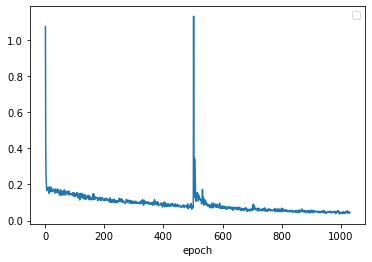

In [18]:
snn.plot_per_epoch(snn.train_loss)

In [14]:
for images, labels in train_loader:
    break

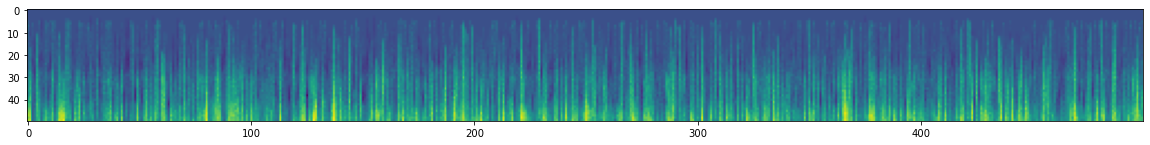

In [15]:
pred, ref = snn.propagate(images.to(device), labels.to(device))
import matplotlib.pyplot as plt
if hasattr(snn, 'mem_state'):
    plt.figure(figsize=(20,10))
    plt.imshow(snn.mem_state['output'][:,:,0].detach().cpu().numpy())
elif hasattr(snn, 'snn_state'):
    plt.figure(figsize=(10,10))
    plt.imshow(snn.snn_state['o_mem'][:,:,0].detach().cpu().numpy())

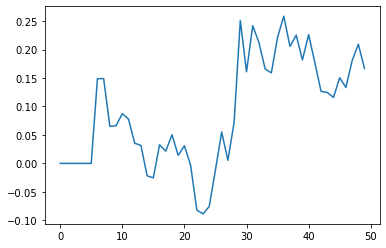

In [16]:
#plt.plot(snn.snn_state['o_mem'][:,2,0].detach().cpu().numpy())
plt.plot(snn.mem_state['output'][:,2,0].detach().cpu().numpy())

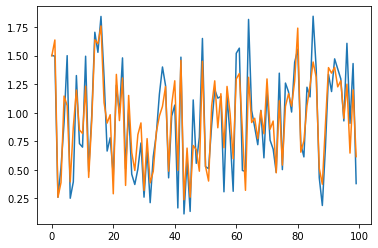

In [17]:
plt.plot(ref[:100].detach().cpu().numpy())
plt.plot(pred[:100].detach().cpu().numpy())

In [22]:
d_test = AddTaskDatasetLoader(time_window, batch_size, randomness=True)
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)
for images, labels in test_loader:
    break


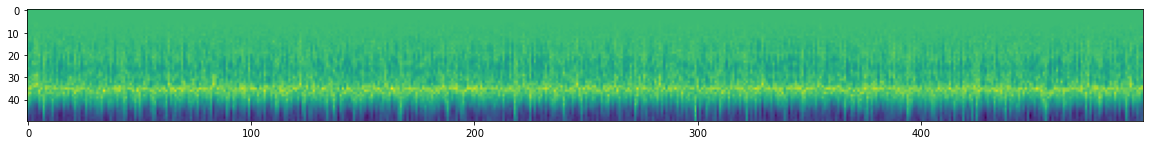

In [23]:
pred, ref = snn.propagate(images.to(device), labels.to(device))
import matplotlib.pyplot as plt
if hasattr(snn, 'mem_state'):
    plt.figure(figsize=(20,10))
    plt.imshow(snn.mem_state['output'][:,:,0].detach().cpu().numpy())
elif hasattr(snn, 'snn_state'):
    plt.figure(figsize=(10,10))
    plt.imshow(snn.snn_state['o_mem'][:,:,0].detach().cpu().numpy())

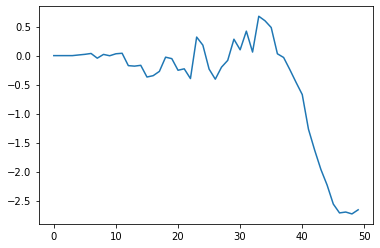

In [24]:
#plt.plot(snn.snn_state['o_mem'][:,2,0].detach().cpu().numpy())
plt.plot(snn.mem_state['output'][:,2,0].detach().cpu().numpy())

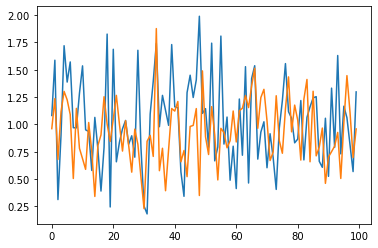

In [27]:
plt.plot(ref[:100].detach().cpu().numpy())
plt.plot(pred[:100].detach().cpu().numpy())